# Notebook for rnn cells dimension study

In [1]:
%matplotlib inline

## Dataset loading
So far, a single source dataset is used

In [2]:
#% Imports
import pandas as pd

#% Data import
#% engine=python because C engine has an error with a character in the middle of
## the file. May be slower but works.

df = pd.read_csv('../Datasets/macdonalds_for_guillaume.csv', engine='python')

## Dataset structure

This work has been moved to the file [dataset.py](dataset.py)

In [3]:
from dataset import Dataset

Using TensorFlow backend.


## Utility functions
* examine_cv gives a quick overview of a cross validation result
* filter_text filters characters from a text

This work has been moved to [utils_npi.py](utils_npi.py)

In [4]:
from npi_utils import examine_cv, filter_text, remove_double

## Models


These classes are used to handle different kind of models seamlessly  
This has been moved to the [models.py](models.py) file

In [5]:
import models

We will use only 1 model to evaluate this.  
The one chosen is the GRU 1 layer 64 cells. This one has good performances and is fast to train. It uses embedding dimension so we can focus on this part.  
Also, it is not too complex, so it should be weak to embedding changes (and easier to analyze).

## Adding datasets
First we add the basic texts set.  
Stemming may help some models. So we will create an additional dataset with the stemmed texts

In [6]:
from nltk import SnowballStemmer

#% Datasets
datasets = []

#% Basic texts
texts = df['text']
y = df['neg_pi'].values

#% Stem words
stemmer = SnowballStemmer("english")

stemmed_texts = [' '.join([stemmer.stem(w) for w in filter_text(t).split()]) for t in texts]
consonnant_code_texts = [remove_double(filter_text(t, filtered="aeiouy")) for t in stemmed_texts]

print('mcdonalds')
datasets.append(Dataset(texts, y, 'mcdonalds'))

print('stemmed mcdonalds')
datasets.append(Dataset(stemmed_texts, y, 'stemmed mcdonalds'))

for dataset in datasets:
    print(dataset.name, ', vocabulary size :', dataset.vocabulary_size)

mcdonalds
stemmed mcdonalds
mcdonalds , vocabulary size : 42239
stemmed mcdonalds , vocabulary size : 36032


## Start the analysis

-----
Keras 50 epochs 4 embedding GRU 2 layers 2 cells
Dataset mcdonalds
This has been done already.
Dataset stemmed mcdonalds
This has been done already.
-----
-----
Keras 50 epochs 4 embedding GRU 2 layers 4 cells
Dataset mcdonalds
This has been done already.
Dataset stemmed mcdonalds
This has been done already.
-----
-----
Keras 50 epochs 4 embedding GRU 2 layers 8 cells
Dataset mcdonalds
This has been done already.
Dataset stemmed mcdonalds
This has been done already.
-----
-----
Keras 50 epochs 4 embedding GRU 2 layers 16 cells
Dataset mcdonalds
This has been done already.
Dataset stemmed mcdonalds
This has been done already.
-----
-----
Keras 50 epochs 4 embedding GRU 2 layers 32 cells
Dataset mcdonalds
This has been done already.
Dataset stemmed mcdonalds
This has been done already.
-----
-----
Keras 50 epochs 4 embedding GRU 2 layers 64 cells
Dataset mcdonalds
This has been done already.
Dataset stemmed mcdonalds
This has been done already.
-----
-----
Keras 50 epochs 4 embeddi

16633/16633 [==============================] - 2s 131us/step - loss: 0.2786 - accuracy: 0.9294 - val_loss: 0.2257 - val_accuracy: 0.9368
Epoch 2/50
16633/16633 [==============================] - 2s 101us/step - loss: 0.1732 - accuracy: 0.9435 - val_loss: 0.1427 - val_accuracy: 0.9502
Epoch 3/50
16633/16633 [==============================] - 2s 103us/step - loss: 0.1055 - accuracy: 0.9600 - val_loss: 0.1383 - val_accuracy: 0.9505
Epoch 4/50
16633/16633 [==============================] - 2s 109us/step - loss: 0.0763 - accuracy: 0.9694 - val_loss: 0.1420 - val_accuracy: 0.9505
Epoch 5/50
16633/16633 [==============================] - 2s 107us/step - loss: 0.0593 - accuracy: 0.9777 - val_loss: 0.1563 - val_accuracy: 0.9512
Epoch 6/50
16633/16633 [==============================] - 2s 103us/step - loss: 0.0546 - accuracy: 0.9796 - val_loss: 0.1576 - val_accuracy: 0.9469
Epoch 7/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.0424 - accuracy: 0.9830 - val_loss: 0.1675

16632/16632 [==============================] - 2s 99us/step - loss: 0.1010 - accuracy: 0.9614 - val_loss: 0.1430 - val_accuracy: 0.9437
Epoch 4/50
16632/16632 [==============================] - 2s 98us/step - loss: 0.0754 - accuracy: 0.9708 - val_loss: 0.1462 - val_accuracy: 0.9454
Epoch 5/50
16632/16632 [==============================] - 2s 99us/step - loss: 0.0600 - accuracy: 0.9763 - val_loss: 0.1624 - val_accuracy: 0.9411
Epoch 6/50
16632/16632 [==============================] - 2s 98us/step - loss: 0.0477 - accuracy: 0.9808 - val_loss: 0.1826 - val_accuracy: 0.9445
Epoch 7/50
16632/16632 [==============================] - 2s 98us/step - loss: 0.0375 - accuracy: 0.9859 - val_loss: 0.2090 - val_accuracy: 0.9454
Epoch 8/50
2311/2311 [==============================] - 0s 133us/step
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 2s 129us/step - loss: 0.2693 - accuracy: 0.9296 - val_loss: 0.2388 - val_accuracy: 0.9303
Epoch 2/5

16633/16633 [==============================] - 2s 98us/step - loss: 0.0502 - accuracy: 0.9808 - val_loss: 0.1950 - val_accuracy: 0.9529
Epoch 7/50
16633/16633 [==============================] - 2s 98us/step - loss: 0.0457 - accuracy: 0.9821 - val_loss: 0.1890 - val_accuracy: 0.9526
Epoch 8/50
16633/16633 [==============================] - 2s 98us/step - loss: 0.0373 - accuracy: 0.9861 - val_loss: 0.1901 - val_accuracy: 0.9490
Epoch 9/50
2310/2310 [==============================] - 0s 129us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 2s 130us/step - loss: 0.2701 - accuracy: 0.9286 - val_loss: 0.2255 - val_accuracy: 0.9360
Epoch 2/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.1649 - accuracy: 0.9457 - val_loss: 0.1442 - val_accuracy: 0.9517
Epoch 3/50
16633/16633 [==============================] - 2s 98us/step - loss: 0.1026 - accuracy: 0.9601 - val_loss: 0.1409 - val_accuracy: 0.9534
Epoch 4/5

16633/16633 [==============================] - 2s 98us/step - loss: 0.0512 - accuracy: 0.9800 - val_loss: 0.1713 - val_accuracy: 0.9433
Epoch 7/50
16633/16633 [==============================] - 2s 98us/step - loss: 0.0414 - accuracy: 0.9842 - val_loss: 0.1925 - val_accuracy: 0.9485
Epoch 8/50
2310/2310 [==============================] - 0s 134us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 2s 127us/step - loss: 0.2793 - accuracy: 0.9289 - val_loss: 0.2375 - val_accuracy: 0.9329
Epoch 2/50
16633/16633 [==============================] - 2s 98us/step - loss: 0.1715 - accuracy: 0.9460 - val_loss: 0.1726 - val_accuracy: 0.9430
Epoch 3/50
16633/16633 [==============================] - 2s 100us/step - loss: 0.1063 - accuracy: 0.9618 - val_loss: 0.1528 - val_accuracy: 0.9445
Epoch 4/50
16633/16633 [==============================] - 2s 104us/step - loss: 0.0795 - accuracy: 0.9683 - val_loss: 0.1489 - val_accuracy: 0.9481
Epoch 5

16634/16634 [==============================] - 2s 98us/step - loss: 0.0489 - accuracy: 0.9808 - val_loss: 0.1721 - val_accuracy: 0.9522
Epoch 7/50
16634/16634 [==============================] - 2s 99us/step - loss: 0.0386 - accuracy: 0.9852 - val_loss: 0.1931 - val_accuracy: 0.9505
Epoch 8/50
16634/16634 [==============================] - 2s 98us/step - loss: 0.0343 - accuracy: 0.9868 - val_loss: 0.2161 - val_accuracy: 0.9459
Epoch 9/50
2309/2309 [==============================] - 0s 127us/step
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 2s 126us/step - loss: 0.2701 - accuracy: 0.9301 - val_loss: 0.2290 - val_accuracy: 0.9300
Epoch 2/50
16632/16632 [==============================] - 2s 99us/step - loss: 0.1498 - accuracy: 0.9490 - val_loss: 0.1493 - val_accuracy: 0.9497
Epoch 3/50
16632/16632 [==============================] - 2s 99us/step - loss: 0.0945 - accuracy: 0.9636 - val_loss: 0.1347 - val_accuracy: 0.9509
Epoch 4/5

16633/16633 [==============================] - 2s 99us/step - loss: 0.0613 - accuracy: 0.9770 - val_loss: 0.1482 - val_accuracy: 0.9490
Epoch 6/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.0508 - accuracy: 0.9808 - val_loss: 0.1605 - val_accuracy: 0.9493
Epoch 7/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.0427 - accuracy: 0.9839 - val_loss: 0.2197 - val_accuracy: 0.9507
Epoch 8/50
2310/2310 [==============================] - 0s 128us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 2s 128us/step - loss: 0.2687 - accuracy: 0.9318 - val_loss: 0.2522 - val_accuracy: 0.9281
Epoch 2/50
16633/16633 [==============================] - 2s 98us/step - loss: 0.1699 - accuracy: 0.9433 - val_loss: 0.1539 - val_accuracy: 0.9476
Epoch 3/50
16633/16633 [==============================] - 2s 97us/step - loss: 0.1012 - accuracy: 0.9618 - val_loss: 0.1418 - val_accuracy: 0.9502
Epoch 4/5

2311/2311 [==============================] - 0s 126us/step
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 2s 129us/step - loss: 0.2748 - accuracy: 0.9304 - val_loss: 0.2374 - val_accuracy: 0.9303
Epoch 2/50
16632/16632 [==============================] - 2s 98us/step - loss: 0.1604 - accuracy: 0.9465 - val_loss: 0.1557 - val_accuracy: 0.9466
Epoch 3/50
16632/16632 [==============================] - 2s 98us/step - loss: 0.1006 - accuracy: 0.9615 - val_loss: 0.1602 - val_accuracy: 0.9435
Epoch 4/50
16632/16632 [==============================] - 2s 99us/step - loss: 0.0760 - accuracy: 0.9710 - val_loss: 0.1652 - val_accuracy: 0.9464
Epoch 5/50
16632/16632 [==============================] - 2s 99us/step - loss: 0.0564 - accuracy: 0.9775 - val_loss: 0.1851 - val_accuracy: 0.9490
Epoch 6/50
16632/16632 [==============================] - 2s 99us/step - loss: 0.0473 - accuracy: 0.9809 - val_loss: 0.1855 - val_accuracy: 0.9392
Epoch 7/5

16633/16633 [==============================] - 2s 99us/step - loss: 0.1029 - accuracy: 0.9601 - val_loss: 0.1407 - val_accuracy: 0.9497
Epoch 4/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.0796 - accuracy: 0.9681 - val_loss: 0.1405 - val_accuracy: 0.9546
Epoch 5/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.0647 - accuracy: 0.9742 - val_loss: 0.1476 - val_accuracy: 0.9471
Epoch 6/50
16633/16633 [==============================] - 2s 99us/step - loss: 0.0504 - accuracy: 0.9812 - val_loss: 0.1720 - val_accuracy: 0.9548
Epoch 7/50
2310/2310 [==============================] - 0s 134us/step
Train on 16634 samples, validate on 4159 samples
Epoch 1/50
16634/16634 [==============================] - 2s 128us/step - loss: 0.2779 - accuracy: 0.9272 - val_loss: 0.2298 - val_accuracy: 0.9344
Epoch 2/50
16634/16634 [==============================] - 2s 98us/step - loss: 0.1613 - accuracy: 0.9464 - val_loss: 0.1550 - val_accuracy: 0.9449
Epoch 3/5

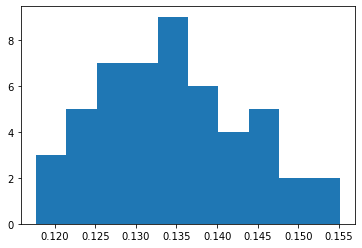

Accuracy scores
Values: 0.9529 (+/- 0.0036)


f1 scores
Values: 0.5926 (+/- 0.0457)


roc scores
Values: 0.9273 (+/- 0.0140)


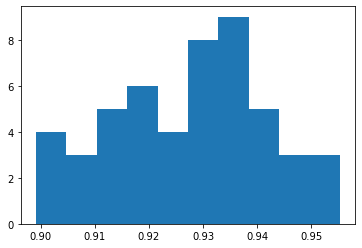

Done. Confidence acc : 0.9456401168850087
-----
-----
Keras 50 epochs 4 embedding GRU 2 layers 512 cells
Dataset mcdonalds
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 5s 272us/step - loss: 0.2681 - accuracy: 0.9303 - val_loss: 0.2409 - val_accuracy: 0.9300
Epoch 2/50
16632/16632 [==============================] - 4s 240us/step - loss: 0.1707 - accuracy: 0.9444 - val_loss: 0.1580 - val_accuracy: 0.9404
Epoch 3/50
16632/16632 [==============================] - 4s 241us/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.1349 - val_accuracy: 0.9553
Epoch 4/50
16632/16632 [==============================] - 4s 240us/step - loss: 0.0681 - accuracy: 0.9738 - val_loss: 0.1381 - val_accuracy: 0.9529
Epoch 5/50
16632/16632 [==============================] - 4s 240us/step - loss: 0.0494 - accuracy: 0.9816 - val_loss: 0.1591 - val_accuracy: 0.9517
Epoch 6/50
16632/16632 [==============================] - 4s 240us/step - loss: 0.0393 -

16633/16633 [==============================] - 5s 272us/step - loss: 0.2703 - accuracy: 0.9309 - val_loss: 0.2442 - val_accuracy: 0.9281
Epoch 2/50
16633/16633 [==============================] - 4s 239us/step - loss: 0.1644 - accuracy: 0.9460 - val_loss: 0.1610 - val_accuracy: 0.9445
Epoch 3/50
16633/16633 [==============================] - 4s 240us/step - loss: 0.0943 - accuracy: 0.9643 - val_loss: 0.1549 - val_accuracy: 0.9469
Epoch 4/50
16633/16633 [==============================] - 4s 241us/step - loss: 0.0684 - accuracy: 0.9731 - val_loss: 0.1391 - val_accuracy: 0.9469
Epoch 5/50
16633/16633 [==============================] - 4s 254us/step - loss: 0.0871 - accuracy: 0.9693 - val_loss: 0.2147 - val_accuracy: 0.9377
Epoch 6/50
16633/16633 [==============================] - 4s 258us/step - loss: 0.0616 - accuracy: 0.9754 - val_loss: 0.1658 - val_accuracy: 0.9459
Epoch 7/50
16633/16633 [==============================] - 4s 255us/step - loss: 0.0411 - accuracy: 0.9838 - val_loss: 0.194

16632/16632 [==============================] - 4s 250us/step - loss: 0.1588 - accuracy: 0.9462 - val_loss: 0.1710 - val_accuracy: 0.9370
Epoch 3/50
16632/16632 [==============================] - 4s 251us/step - loss: 0.1001 - accuracy: 0.9613 - val_loss: 0.1536 - val_accuracy: 0.9485
Epoch 4/50
16632/16632 [==============================] - 4s 251us/step - loss: 0.0731 - accuracy: 0.9721 - val_loss: 0.1576 - val_accuracy: 0.9464
Epoch 5/50
16632/16632 [==============================] - 4s 251us/step - loss: 0.0549 - accuracy: 0.9776 - val_loss: 0.1895 - val_accuracy: 0.9481
Epoch 6/50
16632/16632 [==============================] - 4s 251us/step - loss: 0.0446 - accuracy: 0.9830 - val_loss: 0.2078 - val_accuracy: 0.9454
Epoch 7/50
16632/16632 [==============================] - 4s 251us/step - loss: 0.0320 - accuracy: 0.9881 - val_loss: 0.2502 - val_accuracy: 0.9466
Epoch 8/50
2311/2311 [==============================] - 0s 203us/step
Train on 16633 samples, validate on 4159 samples
Epoc

16633/16633 [==============================] - 4s 251us/step - loss: 0.0506 - accuracy: 0.9808 - val_loss: 0.1700 - val_accuracy: 0.9339
Epoch 6/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.0448 - accuracy: 0.9829 - val_loss: 0.1890 - val_accuracy: 0.9538
Epoch 7/50
16633/16633 [==============================] - 4s 250us/step - loss: 0.0331 - accuracy: 0.9877 - val_loss: 0.1919 - val_accuracy: 0.9440
Epoch 8/50
16633/16633 [==============================] - 4s 252us/step - loss: 0.0331 - accuracy: 0.9875 - val_loss: 0.1875 - val_accuracy: 0.9464
Epoch 9/50
2310/2310 [==============================] - 0s 202us/step
Train on 16634 samples, validate on 4159 samples
Epoch 1/50
16634/16634 [==============================] - 5s 281us/step - loss: 0.2803 - accuracy: 0.9279 - val_loss: 0.2298 - val_accuracy: 0.9344
Epoch 2/50
16634/16634 [==============================] - 4s 249us/step - loss: 0.1751 - accuracy: 0.9418 - val_loss: 0.1900 - val_accuracy: 0.9387
Epoc

2310/2310 [==============================] - 0s 205us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 291us/step - loss: 0.2789 - accuracy: 0.9294 - val_loss: 0.2263 - val_accuracy: 0.9368
Epoch 2/50
16633/16633 [==============================] - 4s 268us/step - loss: 0.1980 - accuracy: 0.9366 - val_loss: 0.1652 - val_accuracy: 0.9473
Epoch 3/50
16633/16633 [==============================] - 4s 264us/step - loss: 0.1185 - accuracy: 0.9568 - val_loss: 0.1429 - val_accuracy: 0.9502
Epoch 4/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.0763 - accuracy: 0.9704 - val_loss: 0.1371 - val_accuracy: 0.9500
Epoch 5/50
16633/16633 [==============================] - 4s 249us/step - loss: 0.0603 - accuracy: 0.9776 - val_loss: 0.1393 - val_accuracy: 0.9502
Epoch 6/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.0433 - accuracy: 0.9841 - val_loss: 0.1700 - val_accuracy: 0.9519
Epoc

2311/2311 [==============================] - 0s 210us/step
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 5s 298us/step - loss: 0.2717 - accuracy: 0.9289 - val_loss: 0.2255 - val_accuracy: 0.9339
Epoch 2/50
16632/16632 [==============================] - 4s 265us/step - loss: 0.1524 - accuracy: 0.9496 - val_loss: 0.1717 - val_accuracy: 0.9430
Epoch 3/50
16632/16632 [==============================] - 4s 267us/step - loss: 0.0926 - accuracy: 0.9649 - val_loss: 0.1323 - val_accuracy: 0.9478
Epoch 4/50
16632/16632 [==============================] - 4s 269us/step - loss: 0.0631 - accuracy: 0.9759 - val_loss: 0.1395 - val_accuracy: 0.9483
Epoch 5/50
16632/16632 [==============================] - 4s 266us/step - loss: 0.0484 - accuracy: 0.9817 - val_loss: 0.1512 - val_accuracy: 0.9409
Epoch 6/50
16632/16632 [==============================] - 4s 267us/step - loss: 0.0386 - accuracy: 0.9859 - val_loss: 0.1751 - val_accuracy: 0.9452
Epoc

16633/16633 [==============================] - 4s 251us/step - loss: 0.1553 - accuracy: 0.9463 - val_loss: 0.1588 - val_accuracy: 0.9457
Epoch 3/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.1017 - accuracy: 0.9600 - val_loss: 0.1444 - val_accuracy: 0.9509
Epoch 4/50
16633/16633 [==============================] - 4s 255us/step - loss: 0.0713 - accuracy: 0.9720 - val_loss: 0.1367 - val_accuracy: 0.9534
Epoch 5/50
16633/16633 [==============================] - 4s 252us/step - loss: 0.0537 - accuracy: 0.9792 - val_loss: 0.1495 - val_accuracy: 0.9517
Epoch 6/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.0410 - accuracy: 0.9846 - val_loss: 0.1861 - val_accuracy: 0.9519
Epoch 7/50
16633/16633 [==============================] - 4s 252us/step - loss: 0.0339 - accuracy: 0.9875 - val_loss: 0.2229 - val_accuracy: 0.9531
Epoch 8/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.219

16633/16633 [==============================] - 4s 244us/step - loss: 0.0901 - accuracy: 0.9660 - val_loss: 0.1426 - val_accuracy: 0.9466
Epoch 4/50
16633/16633 [==============================] - 4s 239us/step - loss: 0.0700 - accuracy: 0.9729 - val_loss: 0.1612 - val_accuracy: 0.9495
Epoch 5/50
16633/16633 [==============================] - 4s 239us/step - loss: 0.0493 - accuracy: 0.9810 - val_loss: 0.1779 - val_accuracy: 0.9389
Epoch 6/50
16633/16633 [==============================] - 4s 240us/step - loss: 0.0434 - accuracy: 0.9837 - val_loss: 0.1999 - val_accuracy: 0.9485
Epoch 7/50
16633/16633 [==============================] - 4s 240us/step - loss: 0.0342 - accuracy: 0.9880 - val_loss: 0.2012 - val_accuracy: 0.9493
Epoch 8/50
2310/2310 [==============================] - 0s 195us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 275us/step - loss: 0.2837 - accuracy: 0.9294 - val_loss: 0.2329 - val_accuracy: 0.9329
Epoc

16634/16634 [==============================] - 4s 239us/step - loss: 0.0319 - accuracy: 0.9876 - val_loss: 0.2012 - val_accuracy: 0.9512
Epoch 8/50
16634/16634 [==============================] - 4s 242us/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.2354 - val_accuracy: 0.9509
Epoch 9/50
2309/2309 [==============================] - 0s 200us/step
Done, time spent 1949742.4964904785 ms
log loss
Values: 0.1322 (+/- 0.0111)


Accuracy scores
Values: 0.9542 (+/- 0.0032)


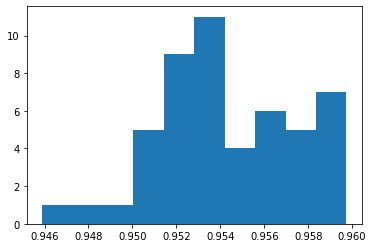

f1 scores
Values: 0.6060 (+/- 0.0532)


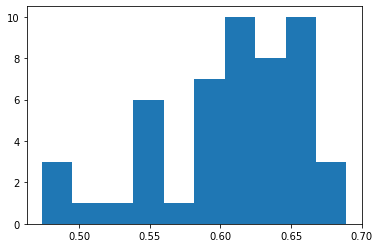

roc scores
Values: 0.9298 (+/- 0.0159)


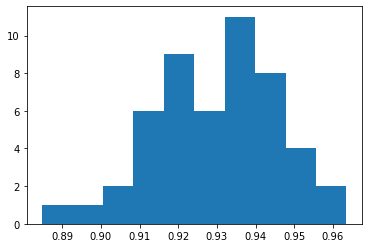

Done. Confidence acc : 0.9478134556864319
Dataset stemmed mcdonalds
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 5s 286us/step - loss: 0.2705 - accuracy: 0.9309 - val_loss: 0.2439 - val_accuracy: 0.9300
Epoch 2/50
16632/16632 [==============================] - 4s 261us/step - loss: 0.1722 - accuracy: 0.9447 - val_loss: 0.2073 - val_accuracy: 0.9346
Epoch 3/50
16632/16632 [==============================] - 4s 253us/step - loss: 0.1143 - accuracy: 0.9589 - val_loss: 0.1426 - val_accuracy: 0.9531
Epoch 4/50
16632/16632 [==============================] - 4s 250us/step - loss: 0.0751 - accuracy: 0.9714 - val_loss: 0.1253 - val_accuracy: 0.9536
Epoch 5/50
16632/16632 [==============================] - 4s 257us/step - loss: 0.0596 - accuracy: 0.9770 - val_loss: 0.1403 - val_accuracy: 0.9490
Epoch 6/50
16632/16632 [==============================] - 4s 246us/step - loss: 0.0468 - accuracy: 0.9815 - val_loss: 0.1757 - val_accuracy: 0.

16633/16633 [==============================] - 4s 263us/step - loss: 0.0733 - accuracy: 0.9711 - val_loss: 0.1612 - val_accuracy: 0.9524
Epoch 5/50
16633/16633 [==============================] - 4s 259us/step - loss: 0.0584 - accuracy: 0.9772 - val_loss: 0.1609 - val_accuracy: 0.9485
Epoch 6/50
16633/16633 [==============================] - 4s 249us/step - loss: 0.0486 - accuracy: 0.9815 - val_loss: 0.1853 - val_accuracy: 0.9522
Epoch 7/50
16633/16633 [==============================] - 4s 248us/step - loss: 0.0411 - accuracy: 0.9844 - val_loss: 0.1835 - val_accuracy: 0.9473
Epoch 8/50
2310/2310 [==============================] - 0s 202us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 276us/step - loss: 0.2792 - accuracy: 0.9297 - val_loss: 0.2227 - val_accuracy: 0.9360
Epoch 2/50
16633/16633 [==============================] - 4s 246us/step - loss: 0.1724 - accuracy: 0.9435 - val_loss: 0.1531 - val_accuracy: 0.9531
Epoc

16632/16632 [==============================] - 4s 255us/step - loss: 0.0623 - accuracy: 0.9758 - val_loss: 0.1759 - val_accuracy: 0.9485
Epoch 6/50
16632/16632 [==============================] - 4s 265us/step - loss: 0.0472 - accuracy: 0.9812 - val_loss: 0.2088 - val_accuracy: 0.9478
Epoch 7/50
16632/16632 [==============================] - 4s 255us/step - loss: 0.0379 - accuracy: 0.9860 - val_loss: 0.2237 - val_accuracy: 0.9457
Epoch 8/50
16632/16632 [==============================] - 4s 254us/step - loss: 0.0332 - accuracy: 0.9880 - val_loss: 0.2550 - val_accuracy: 0.9423
Epoch 9/50
2311/2311 [==============================] - 0s 215us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 277us/step - loss: 0.2710 - accuracy: 0.9277 - val_loss: 0.2264 - val_accuracy: 0.9353
Epoch 2/50
16633/16633 [==============================] - 4s 243us/step - loss: 0.1834 - accuracy: 0.9373 - val_loss: 0.1595 - val_accuracy: 0.9452
Epoc

16633/16633 [==============================] - 4s 242us/step - loss: 0.0619 - accuracy: 0.9763 - val_loss: 0.1436 - val_accuracy: 0.9524
Epoch 6/50
16633/16633 [==============================] - 4s 244us/step - loss: 0.0515 - accuracy: 0.9793 - val_loss: 0.1611 - val_accuracy: 0.9507
Epoch 7/50
16633/16633 [==============================] - 4s 244us/step - loss: 0.0403 - accuracy: 0.9843 - val_loss: 0.1860 - val_accuracy: 0.9497
Epoch 8/50
2310/2310 [==============================] - 0s 197us/step
Train on 16634 samples, validate on 4159 samples
Epoch 1/50
16634/16634 [==============================] - 5s 274us/step - loss: 0.2771 - accuracy: 0.9316 - val_loss: 0.2261 - val_accuracy: 0.9344
Epoch 2/50
16634/16634 [==============================] - 4s 242us/step - loss: 0.1577 - accuracy: 0.9474 - val_loss: 0.1478 - val_accuracy: 0.9466
Epoch 3/50
16634/16634 [==============================] - 4s 242us/step - loss: 0.1145 - accuracy: 0.9570 - val_loss: 0.1500 - val_accuracy: 0.9478
Epoc

16633/16633 [==============================] - 4s 242us/step - loss: 0.0614 - accuracy: 0.9761 - val_loss: 0.1473 - val_accuracy: 0.9507
Epoch 6/50
16633/16633 [==============================] - 4s 241us/step - loss: 0.0466 - accuracy: 0.9817 - val_loss: 0.1723 - val_accuracy: 0.9536
Epoch 7/50
16633/16633 [==============================] - 4s 241us/step - loss: 0.0405 - accuracy: 0.9844 - val_loss: 0.1866 - val_accuracy: 0.9485
Epoch 8/50
16633/16633 [==============================] - 4s 240us/step - loss: 0.0323 - accuracy: 0.9882 - val_loss: 0.1971 - val_accuracy: 0.9413
Epoch 9/50
2310/2310 [==============================] - 0s 199us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 272us/step - loss: 0.2689 - accuracy: 0.9285 - val_loss: 0.2150 - val_accuracy: 0.9368
Epoch 2/50
16633/16633 [==============================] - 4s 254us/step - loss: 0.1793 - accuracy: 0.9393 - val_loss: 0.1629 - val_accuracy: 0.9466
Epoc

16632/16632 [==============================] - 4s 241us/step - loss: 0.0454 - accuracy: 0.9822 - val_loss: 0.1590 - val_accuracy: 0.9509
Epoch 7/50
2311/2311 [==============================] - 0s 192us/step
Train on 16632 samples, validate on 4159 samples
Epoch 1/50
16632/16632 [==============================] - 5s 271us/step - loss: 0.2750 - accuracy: 0.9296 - val_loss: 0.2228 - val_accuracy: 0.9339
Epoch 2/50
16632/16632 [==============================] - 4s 241us/step - loss: 0.1612 - accuracy: 0.9458 - val_loss: 0.1487 - val_accuracy: 0.9488
Epoch 3/50
16632/16632 [==============================] - 4s 241us/step - loss: 0.0961 - accuracy: 0.9633 - val_loss: 0.1354 - val_accuracy: 0.9517
Epoch 4/50
16632/16632 [==============================] - 4s 242us/step - loss: 0.0694 - accuracy: 0.9734 - val_loss: 0.1332 - val_accuracy: 0.9476
Epoch 5/50
16632/16632 [==============================] - 4s 245us/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 0.1899 - val_accuracy: 0.9490
Epoc

16633/16633 [==============================] - 4s 250us/step - loss: 0.0343 - accuracy: 0.9871 - val_loss: 0.2321 - val_accuracy: 0.9507
Epoch 9/50
2310/2310 [==============================] - 0s 197us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 282us/step - loss: 0.2755 - accuracy: 0.9289 - val_loss: 0.2276 - val_accuracy: 0.9360
Epoch 2/50
16633/16633 [==============================] - 4s 247us/step - loss: 0.1754 - accuracy: 0.9437 - val_loss: 0.1554 - val_accuracy: 0.9507
Epoch 3/50
16633/16633 [==============================] - 4s 248us/step - loss: 0.1043 - accuracy: 0.9611 - val_loss: 0.1286 - val_accuracy: 0.9526
Epoch 4/50
16633/16633 [==============================] - 4s 248us/step - loss: 0.0751 - accuracy: 0.9695 - val_loss: 0.1249 - val_accuracy: 0.9534
Epoch 5/50
16633/16633 [==============================] - 4s 253us/step - loss: 0.0629 - accuracy: 0.9755 - val_loss: 0.1436 - val_accuracy: 0.9517
Epoc

16632/16632 [==============================] - 4s 243us/step - loss: 0.0404 - accuracy: 0.9844 - val_loss: 0.2206 - val_accuracy: 0.9471
Epoch 8/50
16632/16632 [==============================] - 4s 244us/step - loss: 0.0336 - accuracy: 0.9881 - val_loss: 0.2178 - val_accuracy: 0.9406
Epoch 9/50
2311/2311 [==============================] - 0s 198us/step
Train on 16633 samples, validate on 4159 samples
Epoch 1/50
16633/16633 [==============================] - 5s 274us/step - loss: 0.2757 - accuracy: 0.9270 - val_loss: 0.2276 - val_accuracy: 0.9353
Epoch 2/50
16633/16633 [==============================] - 4s 254us/step - loss: 0.1694 - accuracy: 0.9434 - val_loss: 0.1724 - val_accuracy: 0.9452
Epoch 3/50
16633/16633 [==============================] - 4s 245us/step - loss: 0.1104 - accuracy: 0.9599 - val_loss: 0.1392 - val_accuracy: 0.9473
Epoch 4/50
16633/16633 [==============================] - 4s 243us/step - loss: 0.0790 - accuracy: 0.9702 - val_loss: 0.1368 - val_accuracy: 0.9493
Epoc

16633/16633 [==============================] - 4s 242us/step - loss: 0.0624 - accuracy: 0.9755 - val_loss: 0.1927 - val_accuracy: 0.9497
Epoch 6/50
16633/16633 [==============================] - 4s 251us/step - loss: 0.0486 - accuracy: 0.9811 - val_loss: 0.1861 - val_accuracy: 0.9360
Epoch 7/50
16633/16633 [==============================] - 4s 243us/step - loss: 0.0382 - accuracy: 0.9853 - val_loss: 0.1988 - val_accuracy: 0.9473
Epoch 8/50
2310/2310 [==============================] - 0s 195us/step
Train on 16634 samples, validate on 4159 samples
Epoch 1/50
16634/16634 [==============================] - 5s 274us/step - loss: 0.2736 - accuracy: 0.9302 - val_loss: 0.2262 - val_accuracy: 0.9344
Epoch 2/50
16634/16634 [==============================] - 4s 252us/step - loss: 0.1561 - accuracy: 0.9459 - val_loss: 0.1584 - val_accuracy: 0.9437
Epoch 3/50
16634/16634 [==============================] - 4s 242us/step - loss: 0.1008 - accuracy: 0.9622 - val_loss: 0.1619 - val_accuracy: 0.9471
Epoc

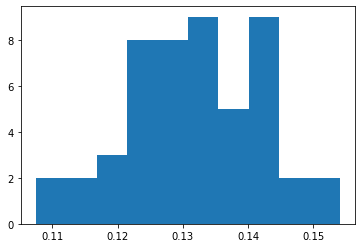

Accuracy scores
Values: 0.9535 (+/- 0.0036)


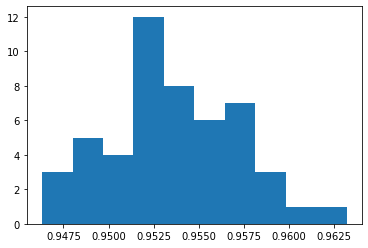

f1 scores
Values: 0.6028 (+/- 0.0442)


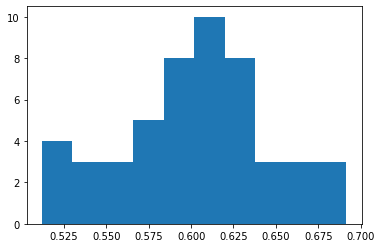

roc scores
Values: 0.9307 (+/- 0.0152)


Done. Confidence acc : 0.946347045338782
-----


In [7]:
import time
from os import path
import os
import numpy as np

#% Result file
result_file = 'result_cells.csv'

#% Clear the result file
clear_file = False

#% Models/Datasets done
models_dataset_done = []

if path.exists(result_file) and not clear_file:
    result_content = pd.read_csv(result_file, engine='python')
    models_dataset_done = [(e[0], e[1]) for e in result_content[['model','dataset']].values]
else:
    clear_file = True

if clear_file:
    f = open(result_file, "w")
    f.write('model,dataset,accuracies,mean_acc,std_acc,f1_scores,mean_f1,std_f1,log_loss,mean_log_loss,std_log_loss,roc_auc_scores,mean_roc_auc,std_roc_auc,ms_time\n')
    f.close()
    
cells_sizes = 2**np.arange(1, 10)
    
#% Analyze on every dataset
for cell_size in cells_sizes:
    model = models.GRU2ModelHandler(embedding_size = 4, cell_size = cell_size)
    model_name = ' '.join(model.get_info())
    print('-----')
    print(model_name)

    for dataset in datasets:
        print('Dataset', dataset.name)

        #% Check if it has already been done
        if (model_name, dataset.name) in models_dataset_done:
            print('This has been done already.')
            continue

        cv_accuracies = []
        cv_f1s = []
        cv_logloss = []
        cv_rocaucs = []

        #% Time the cross validation to have an idea on how long it takes to fit
        time1 = time.time()

        #% We used 10 folds cross validation
        for i in range(5):
            cv_accuracies_, cv_f1s_, cv_logloss_, cv_rocaucs_ = model.cross_validate(dataset, 10)
            cv_accuracies += cv_accuracies_
            cv_logloss += cv_logloss_
            cv_f1s += cv_f1s_
            cv_rocaucs += cv_rocaucs_

        time2 = time.time()
        #% Elapsed time in ms
        ms_time = (time2 - time1) * 1000.0

        print('Done, time spent', ms_time, 'ms')

        #% Display a summary of the model perfs
        print('log loss')
        mean_logloss, std_logloss = examine_cv(cv_logloss)
        print('Accuracy scores')
        mean_acc, std_acc = examine_cv(cv_accuracies)
        print('f1 scores')
        mean_f1, std_f1 = examine_cv(cv_f1s)
        print('roc scores')
        mean_roc, std_roc = examine_cv(cv_rocaucs)

        #% Add entry to result file
        file_entry = []
        file_entry.append(model_name)
        file_entry.append(dataset.name)
        file_entry.append(';'.join([str(s) for s in sorted(cv_accuracies)]))
        file_entry.append(str(mean_acc))
        file_entry.append(str(std_acc))
        file_entry.append(';'.join([str(s) for s in sorted(cv_f1s)]))
        file_entry.append(str(mean_f1))
        file_entry.append(str(std_f1))
        file_entry.append(';'.join([str(s) for s in sorted(cv_logloss)]))
        file_entry.append(str(mean_logloss))
        file_entry.append(str(std_logloss))
        file_entry.append(';'.join([str(s) for s in sorted(cv_rocaucs)]))
        file_entry.append(str(mean_roc))
        file_entry.append(str(std_roc))
        file_entry.append(str(ms_time))

        f = open(result_file, "a")
        f.write(','.join(file_entry) + '\n')
        f.close()
        print('Done. Confidence acc :', mean_acc - 2 * std_acc)
    print('-----')

## Result gathering and analysis

In [14]:
import pandas as pd
import numpy as np

#% Result file
result_file = 'result_cells.csv'

#% Display result
result_content = pd.read_csv(result_file, engine='python')
result_content

model            dataset  \
0    Keras 50 epochs 4 embedding GRU 2 layers 2 cells          mcdonalds   
1    Keras 50 epochs 4 embedding GRU 2 layers 2 cells  stemmed mcdonalds   
2    Keras 50 epochs 4 embedding GRU 2 layers 4 cells          mcdonalds   
3    Keras 50 epochs 4 embedding GRU 2 layers 4 cells  stemmed mcdonalds   
4    Keras 50 epochs 4 embedding GRU 2 layers 8 cells          mcdonalds   
5    Keras 50 epochs 4 embedding GRU 2 layers 8 cells  stemmed mcdonalds   
6   Keras 50 epochs 4 embedding GRU 2 layers 16 cells          mcdonalds   
7   Keras 50 epochs 4 embedding GRU 2 layers 16 cells  stemmed mcdonalds   
8   Keras 50 epochs 4 embedding GRU 2 layers 32 cells          mcdonalds   
9   Keras 50 epochs 4 embedding GRU 2 layers 32 cells  stemmed mcdonalds   
10  Keras 50 epochs 4 embedding GRU 2 layers 64 cells          mcdonalds   
11  Keras 50 epochs 4 embedding GRU 2 layers 64 cells  stemmed mcdonalds   
12  Keras 50 epochs 4 embedding GRU 2 layers 128 c...          mcdonalds   
13  Keras 50 epochs 4 embedding GRU 2 layers 128 c...  stemmed mcdonalds   
14  Keras 50 epochs 4 embedding GRU 2 layers 256 c...          mcdonalds   
15  Keras 50 epochs 4 embedding GRU 2 layers 256 c...  stemmed mcdonalds   
16  Keras 50 epochs 4 embedding GRU 2 layers 512 c...          mcdonalds   
17  Keras 50 epochs 4 embedding GRU 2 layers 512 c...  stemmed mcdonalds   

                                           accuracies  mean_acc   std_acc  \
0   0.9489177465438843;0.9489177465438843;0.949805...  0.955285  0.003283   
1   0.9471861720085144;0.9476190209388733;0.948484...  0.955380  0.003724   
2   0.9463203549385071;0.9471861720085144;0.948917...  0.953571  0.003662   
3   0.9432900547981262;0.9458874464035034;0.948484...  0.954549  0.003867   
4   0.9441558718681335;0.9454545378684998;0.946320...  0.952142  0.003654   
5   0.9459108710289001;0.9467532634735107;0.946753...  0.952705  0.003911   
6   0.9450216293334961;0.9458874464035034;0.946320...  0.952246  0.003544   
7   0.9441558718681335;0.9450454115867615;0.945454...  0.952264  0.003811   
8   0.9467532634735107;0.9471861720085144;0.947186...  0.952896  0.003241   
9   0.9458874464035034;0.9467532634735107;0.947619...  0.952809  0.003823   
10  0.9467532634735107;0.9471861720085144;0.947209...  0.952662  0.003084   
11  0.9471861720085144;0.9476190209388733;0.947619...  0.953173  0.003268   
12  0.9450454115867615;0.9476417303085327;0.948917...  0.953433  0.003059   
13  0.9475963711738586;0.9476190209388733;0.948051...  0.953277  0.003224   
14  0.9450216293334961;0.946776270866394;0.9476190...  0.952619  0.003412   
15  0.9436985850334167;0.9454545378684998;0.946753...  0.952930  0.003645   
16  0.9458874464035034;0.948051929473877;0.9493506...  0.954160  0.003173   
17  0.9463203549385071;0.9471861720085144;0.947209...  0.953536  0.003595   

                                            f1_scores   mean_f1    std_f1  \
0   0.5902777777777777;0.5942028985507245;0.596226...  0.634328  0.028010   
1   0.5734767025089605;0.5868725868725869;0.588235...  0.636121  0.030515   
2   0.5664335664335665;0.5755395683453238;0.583941...  0.623659  0.029510   
3   0.5454545454545454;0.5647840531561461;0.571428...  0.628245  0.030088   
4   0.5505226480836237;0.5509433962264152;0.558490...  0.603211  0.029491   
5   0.5378787878787877;0.5494505494505494;0.559139...  0.607985  0.030371   
6   0.5;0.5411764705882354;0.5447470817120622;0.55...  0.598635  0.033254   
7   0.5376344086021505;0.5468164794007491;0.550387...  0.602651  0.027865   
8   0.4910714285714286;0.5365853658536586;0.537190...  0.597648  0.034079   
9   0.5358490566037736;0.5414847161572053;0.545454...  0.598782  0.033210   
10  0.4910714285714286;0.5087719298245614;0.510822...  0.585519  0.037058   
11  0.5043478260869565;0.5179282868525896;0.541666...  0.598801  0.034492   
12  0.42654028436018965;0.502283105022831;0.510638...  0.597495  0.045707   
13  0.5022026431718061;0.5022421524663677;0.529644...  0.5937

In [19]:
#% Recover embedding size for each model
def get_model_cells(row):
    params = row['model'].split()
    return int(params[params.index('cells') - 1])

result_content['cell_size'] = result_content.apply(get_model_cells, axis=1)

In [21]:
#% Build confidence measures
def confidence(row, value):
    return row['mean_' + value]-2*row['std_' + value]

def df_confidence(df, value):
    result_content['confidence_' + value] = result_content.apply(lambda row:confidence(row, value), axis=1)

df_confidence(result_content, 'acc')
df_confidence(result_content, 'f1')
df_confidence(result_content, 'roc_auc')

In [22]:
#% Product row of the previous categories
result_content['prod'] = result_content.apply(lambda row : row['confidence_acc']*row['confidence_roc_auc']*row['confidence_f1'], axis=1)

In [23]:
#% Unpack roc scores
result_content['roc_auc_scores_'] = result_content.apply(lambda r:list(map(float, r['roc_auc_scores'].split(';'))), axis=1)

mcdonalds


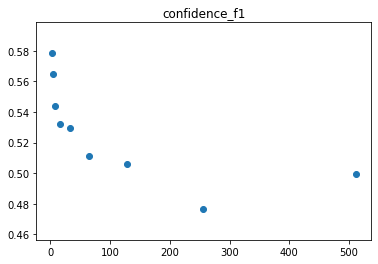

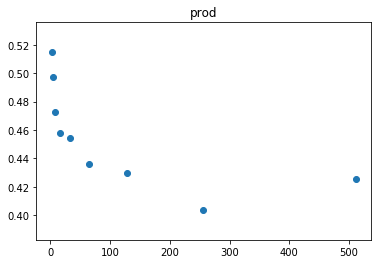

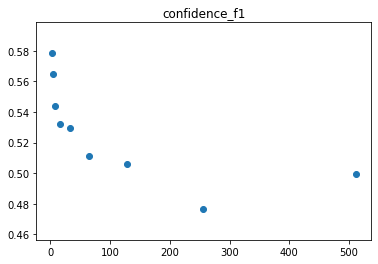

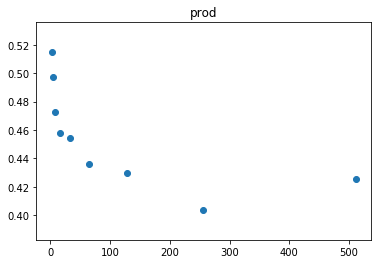

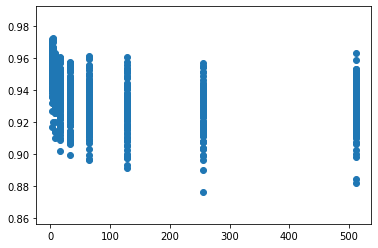

stemmed mcdonalds


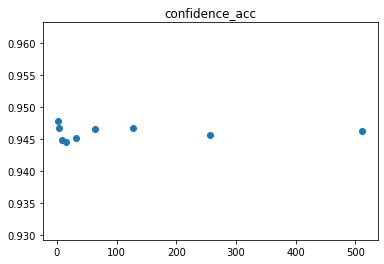

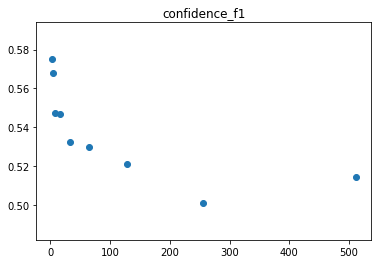

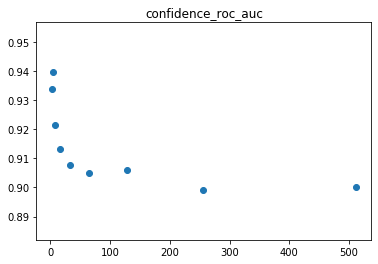

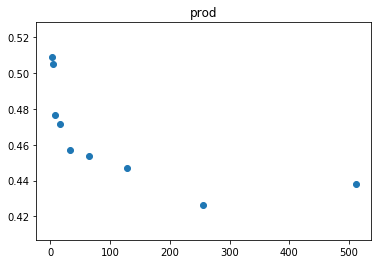

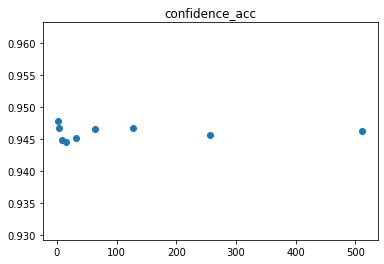

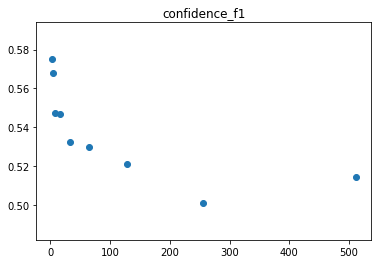

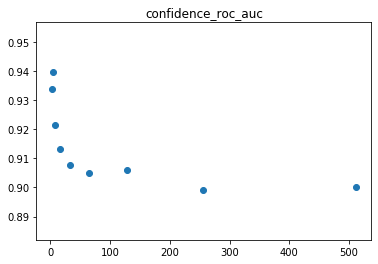

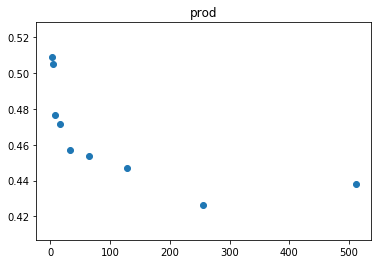

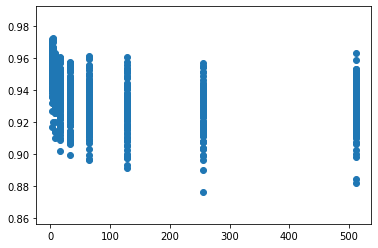

In [25]:
import matplotlib.pyplot as plt

def plot_data(df, col):
    plt.scatter(df['cell_size'], df[col])
    plt.title(col)
    plt.show()

for name, group in result_content.groupby('dataset'):
    print(name)
    plot_data(group, 'confidence_acc')
    plot_data(group, 'confidence_f1')
    plot_data(group, 'confidence_roc_auc')
    plot_data(group, 'prod')
    
    #% Plot the beginning separately
    plot_data(group[group['embedding_size']<50], 'confidence_acc')
    plot_data(group[group['embedding_size']<50], 'confidence_f1')
    plot_data(group[group['embedding_size']<50], 'confidence_roc_auc')
    plot_data(group[group['embedding_size']<50], 'prod')
    
    X = []
    Y = []
    for scores, size in result_content[['roc_auc_scores_', 'cell_size']].values:
        Y += scores
        X += [size for i in range(len(scores))]
    plt.scatter(X, Y)
    plt.show()

Looks like 4 is a good dimension for embedding